* `Pandas 연습과제`
- 과제는 평가의 목적이 아니라 배운 것을 연습하고 성장하는데 있습니다. 과제가 어렵다면 동료의 도움을 받거나 동료의 과제를 보고 따라해 보는 것을 적극 권장합니다.
- <font color="red">그래프 설정에 따라 선의 색상 등이 다르게 표시될 수 있으나 수치 값이 맞으면 제대로 과제를 진행한 것이니 걱정하지 않아도 됩니다. 궁금한 점은 강의실 수업 채널에 남겨주세요!</font>
- 배운것의 느낌이나 해당 데이터셋을 통해 응용해 본것을 공유하는 것은 괜찮지만
- 과제는 오늘코드의 저작물로 `전체 파일`을 블로그 깃헙 등에 그대로 업로드하거나 공유하는 것을 금지합니다.

In [1]:
# 테스트를 위해 아래 셀을 실행해 주세요.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df = sns.load_dataset("taxis")
df.shape

(6433, 14)

Seaborn에서는 다양한 데이터 셋을 제공합니다. 그 중 이번 연습과제에서는 택시 데이터셋을 사용합니다.

* pickup: 택시 탄 시간
* dropoff: 택시 내린 시간
* passengers: 승객수
* distance: 거리
* fare: 요금
* tip: 팁
* tolls: 고속도로 통행료
* total: 총 비용
* color: 색깔
* payment: 지불수단
* pickup_zone: 택시 탄 곳
* dropoff_zone: 택시 내린 곳
* pickup_borough: 택시 탄 도시
* dropoff_borough: 택시 내린 도시

In [52]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [53]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

## Q1. pickup컬럼을 새로운 컬럼인 pickup_time에 pd.to_datetime을 활용해 저장합니다. 

* 다음과 같이 출력되도록 합니다.
```
0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6428   2019-03-31 09:51:53
6429   2019-03-31 17:38:00
6430   2019-03-23 22:55:18
6431   2019-03-04 10:09:25
6432   2019-03-13 19:31:22
Name: pickup_time, Length: 6433, dtype: datetime64[ns]
```

In [54]:
# pd.to_datetime을 활용해봅시다. 출력결과에서 dtype이 datetime64[ns]인지 확인해주세요 :)
df["pickup_time"] = pd.to_datetime(df['pickup'])
df.dtypes

pickup                     object
dropoff                    object
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
pickup_time        datetime64[ns]
dtype: object

## Q2. 새로운 컬럼인 pickup_time에서 ‘2019-03-23 00:06:00'이상과 ‘2019-03-24 00:00:00' 미만를 상위 5개만 출력하세요.

In [55]:
df_02 = df[(df['pickup_time'] >= '2019-03-23 06:00:00') & (df['pickup_time'] < '2019-03-24 00:00:00')]
df_02 .head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23 20:21:09
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.0,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan,2019-03-23 11:48:50
17,2019-03-23 20:50:49,2019-03-23 21:02:07,1,2.60,10.5,2.00,0.0,16.30,yellow,credit card,Midtown Center,East Harlem South,Manhattan,Manhattan,2019-03-23 20:50:49
117,2019-03-23 09:39:25,2019-03-23 09:56:45,0,3.60,15.5,3.75,0.0,22.55,yellow,credit card,Yorkville East,Penn Station/Madison Sq West,Manhattan,Manhattan,2019-03-23 09:39:25
144,2019-03-23 18:35:01,2019-03-23 18:47:39,1,3.20,12.5,2.00,0.0,17.80,yellow,credit card,UN/Turtle Bay South,East Village,Manhattan,Manhattan,2019-03-23 18:35:01


## Q3. pickup_time컬럼을 기준으로 2시간간격으로 gropby한후, 평균을 구하고, 10개만 출력하세요. 그 후, taxis_means변수에 저장하세요.

- 다음과 같이 출력결과가 나오도록 합니다.

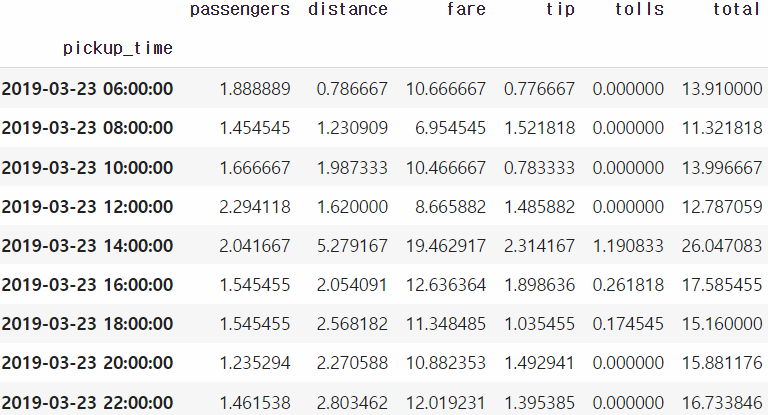

In [56]:
df_03 = df_02 .groupby(pd.Grouper(key='pickup_time', freq='2H')).mean()
taxis_mean = df_03.head(10)
taxis_mean

C:\Users\gusdn\AppData\Local\Temp\ipykernel_2512\613844566.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_03 = df_02 .groupby(pd.Grouper(key='pickup_time', freq='2H')).mean()


,passengers,distance,fare,tip,tolls,total
pickup_time,,,,,,
2019-03-23 06:00:00,1.888889,0.786667,10.666667,0.776667,0.000000,13.910000
2019-03-23 08:00:00,1.454545,1.230909,6.954545,1.521818,0.000000,11.321818
2019-03-23 10:00:00,1.666667,1.987333,10.466667,0.783333,0.000000,13.996667
2019-03-23 12:00:00,2.294118,1.620000,8.665882,1.485882,0.000000,12.787059
2019-03-23 14:00:00,2.041667,5.279167,19.462917,2.314167,1.190833,26.047083
2019-03-23 16:00:00,1.545455,2.054091,12.636364,1.898636,0.261818,17.585455
2019-03-23 18:00:00,1.545455,2.568182,11.348485,1.035455,0.174545,15.160000
2019-03-23 20:00:00,1.235294,2.270588,10.882353,1.492941,0.000000,15.881176
2019-03-23 22:00:00,1.461538,2.803462,12.019231,1.395385,0.000000,16.733846


## Q4. distance을 기준으로 plot하세요.

- 다음과 같이 출력결과가 나오도록 합니다.

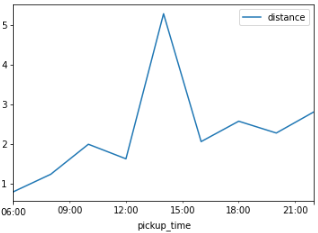

<AxesSubplot:xlabel='pickup_time'>

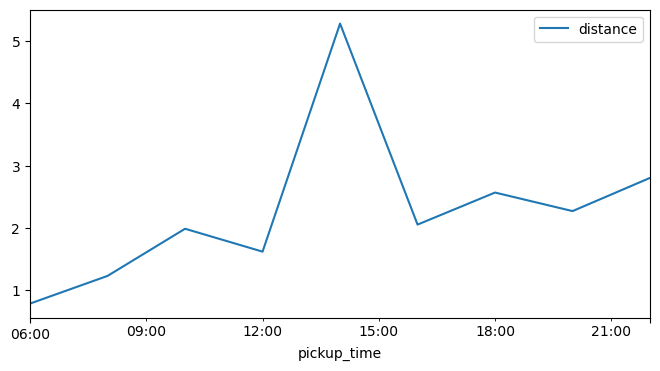

In [57]:
df_03.plot(xlabel='pickup_time',y='distance', figsize=(8,4))

## Q5. tip_in_percent라는 변수에 tip/fare*100 수식을 사용해 저장하세요.

- 다음과 같이 출력결과가 나오도록 합니다.

```
pickup_time
2019-03-23 06:00:00     7.281250
2019-03-23 08:00:00    21.882353
2019-03-23 10:00:00     7.484076
2019-03-23 12:00:00    17.146348
2019-03-23 14:00:00    11.890133
2019-03-23 16:00:00    15.025180
2019-03-23 18:00:00     9.124166
2019-03-23 20:00:00    13.718919
2019-03-23 22:00:00    11.609600
Freq: 2H, Name: tip_in_percent, dtype: float64
```

In [58]:
df_03['tip_in_percent']=df_03['tip']/df_03['fare']*100
df_03['tip_in_percent']

pickup_time
2019-03-23 06:00:00     7.281250
2019-03-23 08:00:00    21.882353
2019-03-23 10:00:00     7.484076
2019-03-23 12:00:00    17.146348
2019-03-23 14:00:00    11.890133
2019-03-23 16:00:00    15.025180
2019-03-23 18:00:00     9.124166
2019-03-23 20:00:00    13.718919
2019-03-23 22:00:00    11.609600
Freq: 2H, Name: tip_in_percent, dtype: float64

## Q6. time_interval인 새로운 컬럼에 0부터 taxis_mean길이만큼의 1시간간격으로 정수를 채워넣으세요.

- 다음과 같이 출력하시오.
```
pickup_time
2019-03-23 06:00:00    0
2019-03-23 08:00:00    1
2019-03-23 10:00:00    2
2019-03-23 12:00:00    3
2019-03-23 14:00:00    4
2019-03-23 16:00:00    5
2019-03-23 18:00:00    6
2019-03-23 20:00:00    7
2019-03-23 22:00:00    8
Freq: 2H, Name: time_interval, dtype: int64
```

In [59]:
df_03['time_interval'] = np.arange(0, len(taxis_mean))
df_03['time_interval']

pickup_time
2019-03-23 06:00:00    0
2019-03-23 08:00:00    1
2019-03-23 10:00:00    2
2019-03-23 12:00:00    3
2019-03-23 14:00:00    4
2019-03-23 16:00:00    5
2019-03-23 18:00:00    6
2019-03-23 20:00:00    7
2019-03-23 22:00:00    8
Freq: 2H, Name: time_interval, dtype: int32

## Q7. 다음 두 컬럼에 대한 correlation을 구하세요.
- tip_in_percent컬럼과 distance

```
-0.15329790936232857
```

In [60]:
df_03['tip_in_percent'].corr(df_03['distance'])

-0.15329790936232857

## Q8. 다음의 결과가 나오도록 grouby를 써서 연산을 하고 count값이 높은 순으로 정렬하고 상위 7개값이 나오도록 출력합니다.
* 아래의 결과가 출력되도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>sum</th>
    </tr>
    <tr>
      <th>passengers</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>4678</td>
      <td>14124.03</td>
    </tr>
    <tr>
      <th>2</th>
      <td>876</td>
      <td>2609.25</td>
    </tr>
    <tr>
      <th>5</th>
      <td>277</td>
      <td>821.08</td>
    </tr>
    <tr>
      <th>3</th>
      <td>243</td>
      <td>762.01</td>
    </tr>
    <tr>
      <th>6</th>
      <td>153</td>
      <td>533.78</td>
    </tr>
    <tr>
      <th>4</th>
      <td>110</td>
      <td>323.01</td>
    </tr>
    <tr>
      <th>0</th>
      <td>96</td>
      <td>284.20</td>
    </tr>
  </tbody>
</table>

In [61]:
df_08 = df.groupby("passengers")["distance"].agg(["count", "sum"]).nlargest(7,'sum')
df_08 = df_08.sort_values(by=['count'], ascending=[False])
df_08

,count,sum
passengers,,
1,4678,14124.03
2,876,2609.25
5,277,821.08
3,243,762.01
6,153,533.78
4,110,323.01
0,96,284.20


## Q9. 결측치를 gray로 시각화해주세요
* 아래의 결과가 출력되도록 합니다.


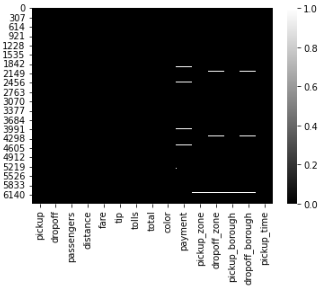

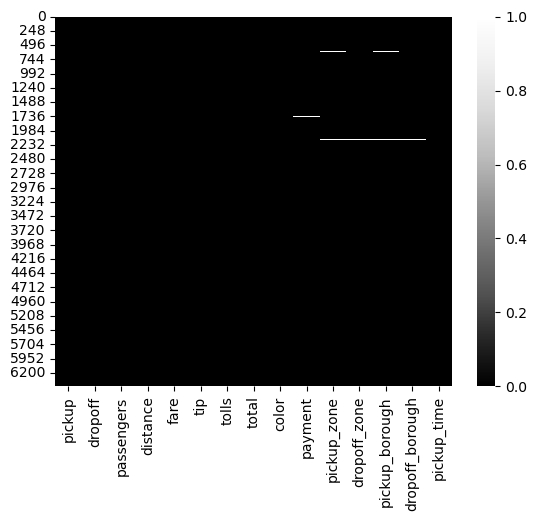

In [62]:
sns.heatmap(df.isnull(),  cmap='Greys_r')
plt.show()

## Q10. 전체 수치 변수의 히스토그램을 시각화해주세요. bin의 수는 100으로 지정해주세요.
* 아래의 결과가 출력되도록 합니다.

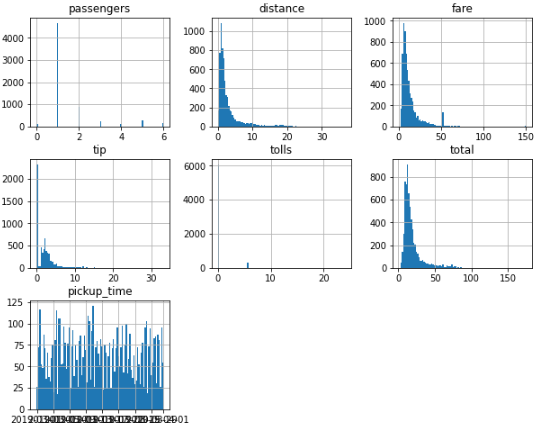

array([[<AxesSubplot:title={'center':'passengers'}>,
        <AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'fare'}>],
       [<AxesSubplot:title={'center':'tip'}>,
        <AxesSubplot:title={'center':'tolls'}>,
        <AxesSubplot:title={'center':'total'}>],
       [<AxesSubplot:title={'center':'pickup_time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

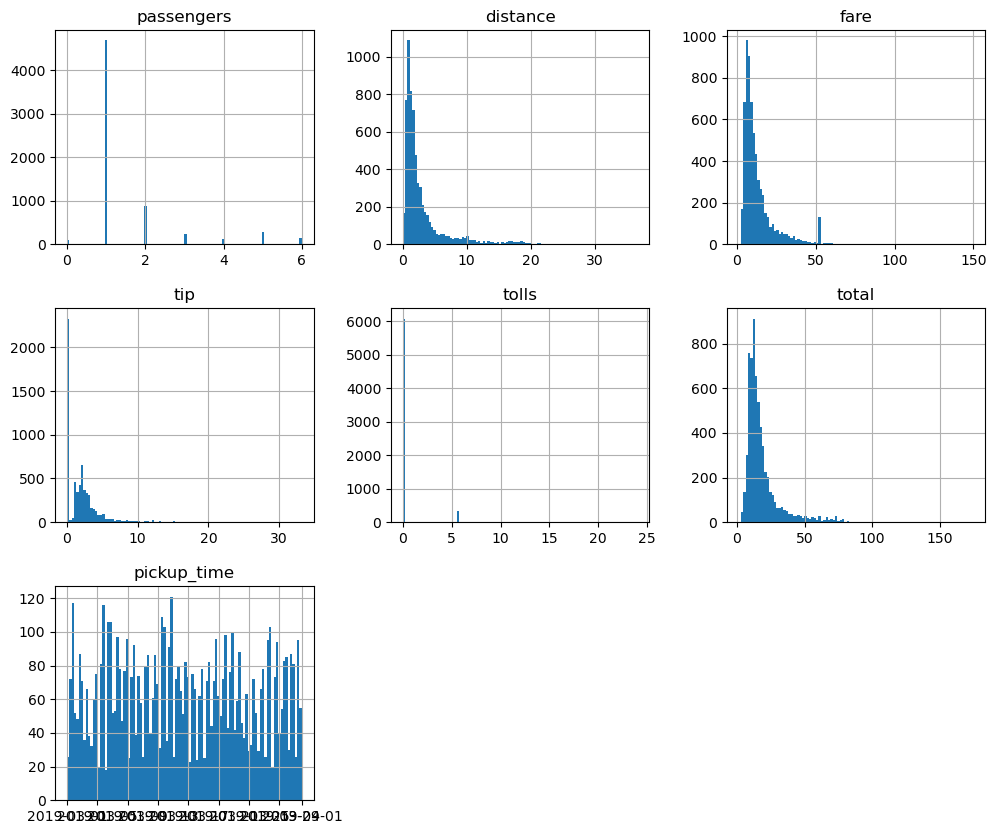

In [63]:
df.hist(bins=100, figsize=(12,10))

## Q11. x축은 fare, y축은 total로 seaborn의 line plot을 그려주세요.
* 아래의 결과가 출력되도록 합니다.

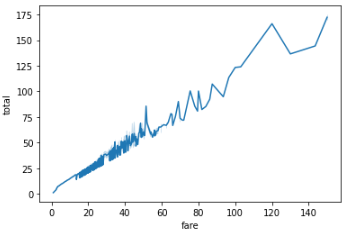

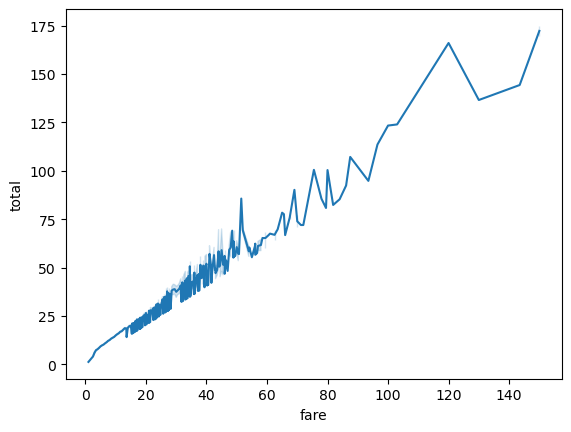

In [64]:
sns.lineplot(data=df, x='fare', y='total')
plt.show()

## Q12. x축은 fare, y축은 total로 joint plot을 그려주세요. hex로 그려주세요.
* 아래의 결과가 출력되도록 합니다.

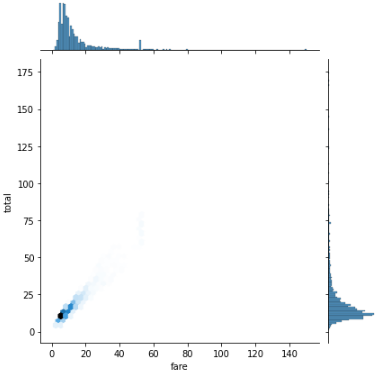

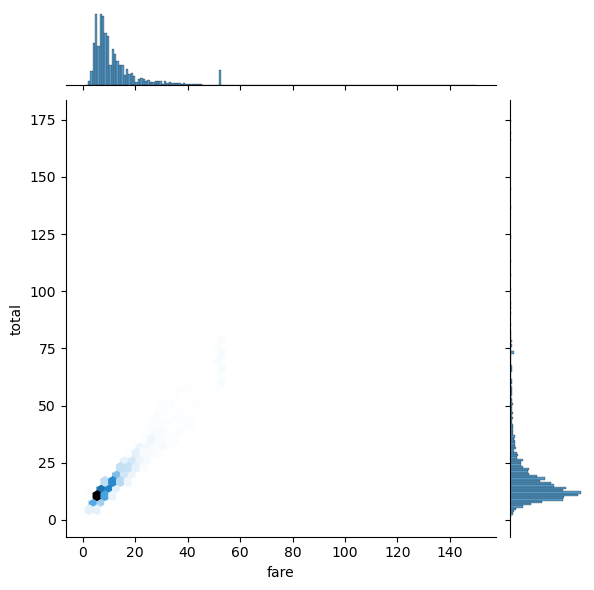

In [65]:
sns.jointplot(data=df, x='fare', y='total', kind='hex')
plt.show()

## Q13. pickup_borough를 모두 대문자로 만들고, pickup_borough_upper 컬럼에 저장하기
* 아래의 결과가 출력되도록 합니다.

```
0       MANHATTAN
1       MANHATTAN
2       MANHATTAN
3       MANHATTAN
4       MANHATTAN
          ...    
6428    MANHATTAN
6429       QUEENS
6430     BROOKLYN
6431     BROOKLYN
6432     BROOKLYN
Name: pickup_borough_upper, Length: 6433, dtype: object
```

In [66]:
df['pickup_borough_upper'] = df['pickup_borough'].str.upper()
df['pickup_borough_upper']

0       MANHATTAN
1       MANHATTAN
2       MANHATTAN
3       MANHATTAN
4       MANHATTAN
          ...    
6428    MANHATTAN
6429       QUEENS
6430     BROOKLYN
6431     BROOKLYN
6432     BROOKLYN
Name: pickup_borough_upper, Length: 6433, dtype: object

## Q14. "pickup_borough" 컬럼의 빈도수를 구하고, borough_count변수에 담습니다.
* 아래의 결과가 출력되도록 합니다.

```
Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64
```

In [67]:
borough_count = df['pickup_borough'].value_counts()
print(borough_count)

Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64


## Q15. "Manhattan", "Queens", "Brooklyn", "Bronx"을 리스트로 만들어 borough_list변수에 저장하세요.
* 아래의 결과가 출력되도록 합니다.

```
['Manhattan', 'Queens', 'Brooklyn', 'Bronx']
```

In [68]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# 리스트로 만들어 borough_list 변수로 재사용하기
borough_list = [key for key in borough_count.keys()]
print(borough_list)

['Manhattan', 'Queens', 'Brooklyn', 'Bronx']


## Q16. 인덱스값을 borough명으로 변경하고, 시각화합니다.
* 아래의 결과가 출력되도록 합니다.

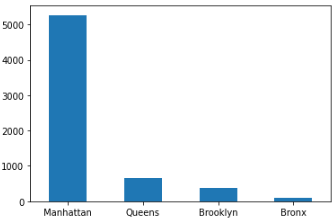

<AxesSubplot:>

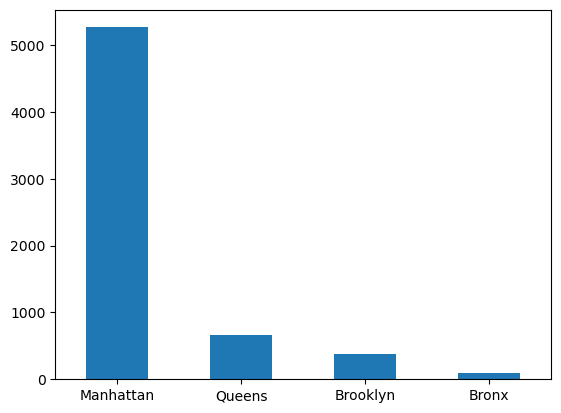

In [69]:
borough_count.plot.bar(rot=0)

## Q17. pivot_table로 pickup_borough별 passengers 수의 합계를 구하시오
* 아래의 결과가 출력되도록 합니다.

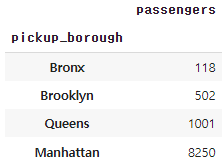

In [70]:
# pickup_borough별 passengers 수 합계
q17=pd.pivot_table(df, values='passengers', index='pickup_borough', aggfunc='sum')
q17 = q17.sort_values('passengers', ascending=[True])
q17

,passengers
pickup_borough,
Bronx,118
Brooklyn,502
Queens,1001
Manhattan,8250


## Q18. pickup_borough별 passengers 수의 합계를 sns.barplot로 시각화하세요.
* 아래의 결과가 출력되도록 합니다.

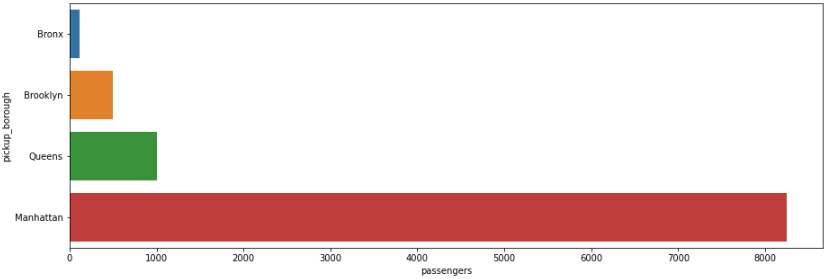

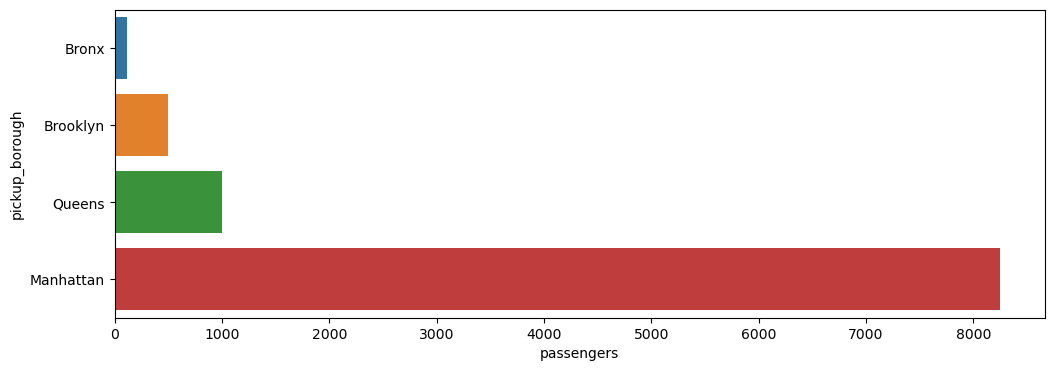

In [71]:
sns.barplot(x='passengers', y=q17.index, data=q17, orient='h')
plt.gcf().set_size_inches(12, 4)

## Q19. pickup_zone별 passengers 합계 groupby 로 구하고 상위 5개 출력하기
* 아래의 결과가 출력되도록 합니다.

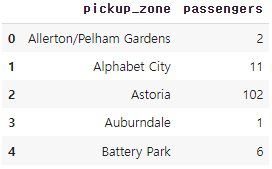

In [72]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_time,pickup_borough_upper
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23 20:21:09,MANHATTAN
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04 16:11:55,MANHATTAN
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27 17:53:01,MANHATTAN
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10 01:23:59,MANHATTAN
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30 13:27:42,MANHATTAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,2019-03-31 09:51:53,MANHATTAN
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,2019-03-31 17:38:00,QUEENS
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,2019-03-23 22:55:18,BROOKLYN
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,2019-03-04 10:09:25,BROOKLYN


In [73]:
df.groupby('pickup_zone', as_index=False).agg({'passengers':sum}).head(5)

,pickup_zone,passengers
0,Allerton/Pelham Gardens,2
1,Alphabet City,11
2,Astoria,102
3,Auburndale,1
4,Battery Park,6


## Q20. 컬럼들을 float형태로 downcast하기

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pickup                6433 non-null   object        
 1   dropoff               6433 non-null   object        
 2   passengers            6433 non-null   int64         
 3   distance              6433 non-null   float64       
 4   fare                  6433 non-null   float64       
 5   tip                   6433 non-null   float64       
 6   tolls                 6433 non-null   float64       
 7   total                 6433 non-null   float64       
 8   color                 6433 non-null   object        
 9   payment               6389 non-null   object        
 10  pickup_zone           6407 non-null   object        
 11  dropoff_zone          6388 non-null   object        
 12  pickup_borough        6407 non-null   object        
 13  dropoff_borough   

* downcast하기 전의 메모리는 위의 결과처럼 804.2+ KB입니다. float형태로 downcast했을 때, 메모리 용량은 678.6+ KB로 출력되게 해주세요. (메모리용량은 df.info()로 확인하실 수 있습니다)

In [75]:
df["distance"] = df["distance"].astype("float32")
df["fare"] = df["fare"].astype("float32")
df["tip"] = df["tip"].astype("float32")
df["tolls"] = df["tolls"].astype("float32")
df["total"] = df["distance"].astype("float32")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pickup                6433 non-null   object        
 1   dropoff               6433 non-null   object        
 2   passengers            6433 non-null   int64         
 3   distance              6433 non-null   float32       
 4   fare                  6433 non-null   float32       
 5   tip                   6433 non-null   float32       
 6   tolls                 6433 non-null   float32       
 7   total                 6433 non-null   float32       
 8   color                 6433 non-null   object        
 9   payment               6389 non-null   object        
 10  pickup_zone           6407 non-null   object        
 11  dropoff_zone          6388 non-null   object        
 12  pickup_borough        6407 non-null   object        
 13  dropoff_borough   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pickup                6433 non-null   object        
 1   dropoff               6433 non-null   object        
 2   passengers            6433 non-null   int64         
 3   distance              6433 non-null   float32       
 4   fare                  6433 non-null   float32       
 5   tip                   6433 non-null   float32       
 6   tolls                 6433 non-null   float32       
 7   total                 6433 non-null   float32       
 8   color                 6433 non-null   object        
 9   payment               6389 non-null   object        
 10  pickup_zone           6407 non-null   object        
 11  dropoff_zone          6388 non-null   object        
 12  pickup_borough        6407 non-null   object        
 13  dropoff_borough   